📝 **PIPELINE DE MODÉLISATION - ÉTAPES DÉTAILLÉES**
---
1️⃣ **Chargement des données**
- Importation des bibliothèques (`pandas`, `numpy`)
- Lecture du fichier CSV des appartements
- Vérification de la structure des données (`df.info()`, `df.head()`)

2️⃣ **Analyse exploratoire des données (EDA)**
- Dimensions et types de données
- Identification des valeurs manquantes et des doublons
- Suppression des doublons
- Statistiques descriptives et histogrammes
- Matrice de corrélation et heatmap
- Visualisation des relations entre variables et le prix

3️⃣ **Prétraitement des données**
- Extraction des équipements en colonnes booléennes
- Conversion de la colonne `price` en float
- Suppression des colonnes inutiles (`equipment`, `link`)
- Uniformisation des noms de villes (arabe → français)
- Remplacement des valeurs manquantes dans `city_name` par "Unknown"
- Imputation des colonnes numériques par la médiane
- Imputation des colonnes catégorielles par "Unknown"
- Création de nouvelles variables (`price_per_m2`, `total_rooms`, `log_price`)
- Détection et capping des outliers (IQR, business rules)
- Visualisation des boxplots après traitement
- Encodage des variables catégorielles (`city_name` avec LabelEncoder)
- Standardisation des variables numériques

4️⃣ **Sélection des variables explicatives**
- Sélection des variables numériques corrélées au prix (|corr| > 0.15)
- Vérification de la redondance entre variables explicatives

5️⃣ **Séparation des données**
- Définition de la variable cible (`y = df["price"]`)
- Définition des variables explicatives (`X`)
- Division des données en train/test (80% / 20%)

6️⃣ **Entraînement des modèles de régression**
- Entraînement de plusieurs modèles :
    - Régression Linéaire
    - Random Forest Regressor
    - SVR (Support Vector Regressor)
    - Gradient Boosting Regressor
- Évaluation des modèles (MSE, RMSE, MAE, R²)

7️⃣ **Validation croisée**
- Cross-validation (5-fold et 10-fold) pour robustesse

8️⃣ **Optimisation des hyperparamètres**
- Recherche des meilleurs paramètres avec GridSearchCV ou RandomizedSearchCV

9️⃣ **Sélection et sauvegarde du meilleur modèle**
- Comparaison des scores (R², RMSE)
- Sauvegarde du meilleur modèle dans `model.pkl`
---

1️⃣ **CHARGEMENT DES DONNÉES**
---
**Source :** Fichier CSV contenant les données d'appartements au Maroc.
**Objectif :** Charger et examiner la structure des données pour préparer l'analyse.

**Étapes :**
- Importation des bibliothèques nécessaires (`pandas`, `numpy`)
- Lecture du fichier CSV avec `pandas`
- Vérification de la structure des données :
    - `df.info()` : Aperçu des colonnes et types
    - `df.head()` : Aperçu des premières lignes

**Pourquoi cette étape ?**
- S'assurer que les données sont bien chargées et prêtes pour l'analyse
---

1️⃣ **IMPORT DES BIBLIOTHÈQUES**
---
**Objectif :** Charger les bibliothèques nécessaires pour l'analyse et la modélisation.
- `pandas` pour la manipulation des données
- `numpy` pour les opérations numériques
---

In [67]:
import pandas as pd
import numpy as np

1️⃣ **LECTURE DU FICHIER CSV**
---
**Remarque :** Le fichier se trouve dans le dossier `data/`.
**Étapes :**
- Charger les données avec `pd.read_csv()`
- Vérifier la structure et le contenu du DataFrame
---

In [68]:
# Chargement des données depuis le fichier CSV
df = pd.read_csv('../data/appartements-data-db.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB


,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...
4,Appartement à Rabat Agdal,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...


2️⃣ **ANALYSE EXPLORATOIRE DES DONNÉES (EDA)**
---
**Objectif :** Comprendre la structure du jeu de données, identifier les problèmes potentiels et explorer les relations entre variables.

**Étapes principales :**
1. Structure générale : Dimensions, types de données, aperçu des premières lignes
2. Valeurs manquantes et doublons : Identification et traitement
3. Distribution des variables numériques : Statistiques descriptives et visualisations
4. Corrélations : Matrice de corrélation et heatmap
5. Relations avec le prix : Visualisation des liens entre variables et la cible

**Pourquoi cette étape ?**
- Détecter les anomalies et préparer le nettoyage
- Comprendre les variables importantes pour la modélisation
---

In [69]:
# Dimensions et types de données
print('Shape:', df.shape)
print('Types:', df.dtypes)
df.head()

Shape: (1773, 9)
Types: title            object
price            object
city_name        object
salon           float64
nb_rooms        float64
nb_baths        float64
surface_area    float64
equipment        object
link             object
dtype: object


,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...
4,Appartement à Rabat Agdal,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...


In [70]:
# Valeurs manquantes et doublons
print('Valeurs manquantes par colonne:')
print(df.isnull().sum())
print('Nombre de doublons:', df.duplicated().sum())

Valeurs manquantes par colonne:
title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64
Nombre de doublons: 41


In [71]:
# Suppression des doublons
df = df.drop_duplicates()
print('Doublons supprimés. Nouvelle forme:', df.shape)

Doublons supprimés. Nouvelle forme: (1732, 9)


             salon     nb_rooms     nb_baths   surface_area
count  1579.000000  1454.000000  1444.000000    1701.000000
mean      1.263458     2.381706     2.263850     176.827160
std       0.555193     0.668407     7.424766    3005.066251
min       0.000000     1.000000     0.000000       1.000000
25%       1.000000     2.000000     1.000000      71.000000
50%       1.000000     2.000000     2.000000      88.000000
75%       1.000000     3.000000     2.000000     114.000000
max       8.000000     7.000000   134.000000  123456.000000


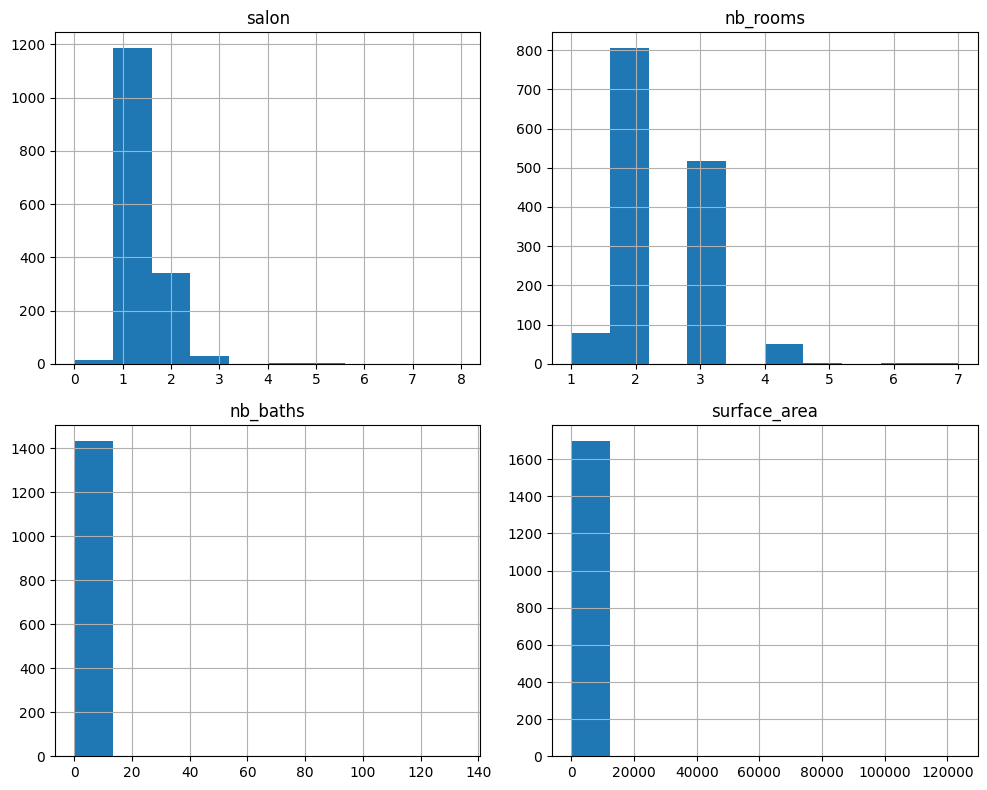

In [72]:
# Statistiques descriptives et histogrammes des variables numériques
print(df.describe())
import matplotlib.pyplot as plt
df.select_dtypes(include=np.number).hist(figsize=(10,8))
plt.tight_layout()
plt.show()

                 salon  nb_rooms  nb_baths  surface_area
salon         1.000000  0.301097  0.031103     -0.002133
nb_rooms      0.301097  1.000000  0.053043      0.617838
nb_baths      0.031103  0.053043  1.000000      0.045448
surface_area -0.002133  0.617838  0.045448      1.000000


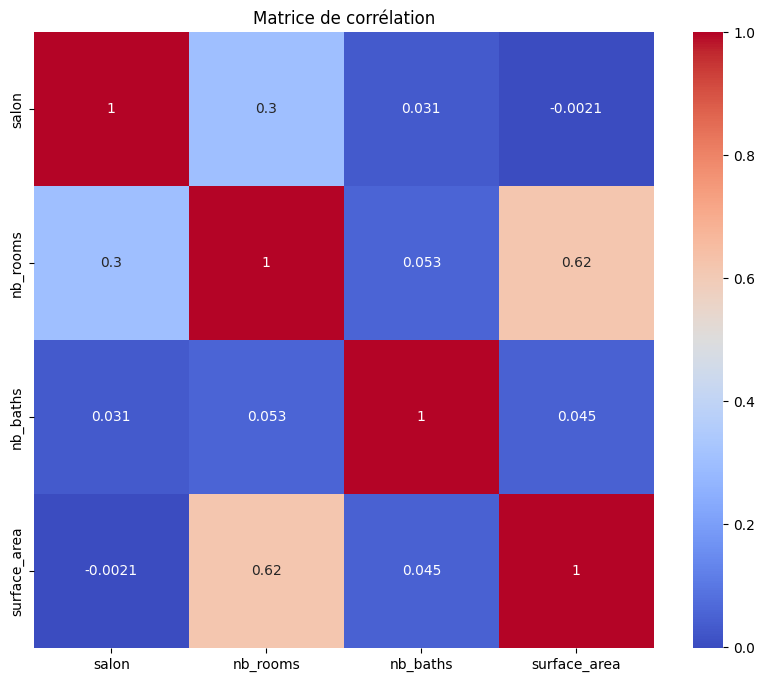

In [73]:
# Matrice de corrélation et heatmap
corr = df.corr(numeric_only=True)
print(corr)
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

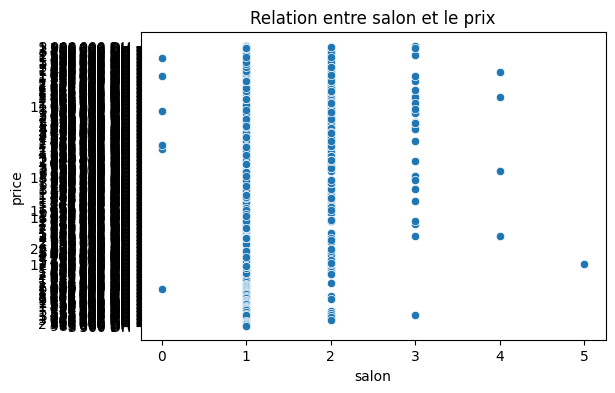

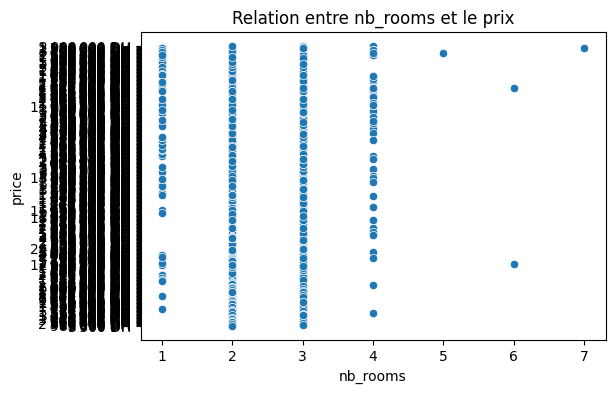

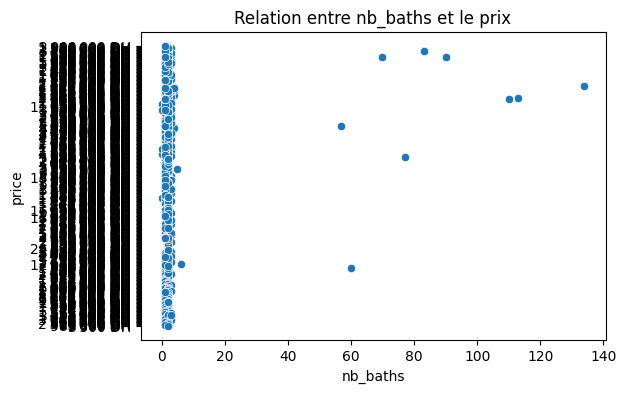

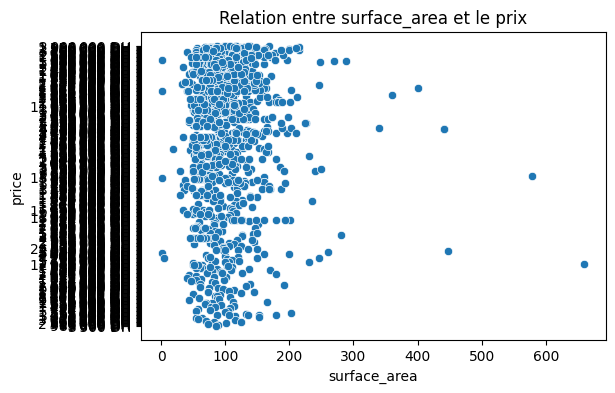

In [74]:
# Visualisation simple des relations entre chaque variable numérique et le prix
import matplotlib.pyplot as plt
import seaborn as sns
if 'price' in df.columns and not df['price'].isnull().all():
    numeric_cols = [col for col in df.select_dtypes(include=np.number).columns if col != 'price']
    for col in numeric_cols:
        if df[col].isnull().all():
            print(f"Toutes les valeurs de la colonne '{col}' sont manquantes.")
            continue
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df['price'])
        plt.title(f'Relation entre {col} et le prix')
        plt.xlabel(col)
        plt.ylabel('price')
        plt.show()

In [75]:
# Extraction des équipements en colonnes booléennes
if 'equipment' in df.columns:
    equipment_dummies = df['equipment'].str.get_dummies(sep='/')
    df = pd.concat([df, equipment_dummies], axis=1)
    print('Colonnes équipements extraites :', equipment_dummies.columns.tolist())

Colonnes équipements extraites : ['Ascenseur', 'Balcon', 'Chauffage', 'Climatisation', 'Concierge', 'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking', 'Sécurité', 'Terrasse']


In [76]:
# Conversion de la colonne price en float et suppression des colonnes inutiles
print("\n1. Conversion de la colonne 'price' en float et suppression des NaN...")
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    print("Colonne 'price' convertie en float.")



1. Conversion de la colonne 'price' en float et suppression des NaN...
Colonne 'price' convertie en float.


In [77]:
if 'equipment' in df.columns:
    df = df.drop('equipment', axis=1)
if 'link' in df.columns:
    df = df.drop('link', axis=1)

In [78]:
# Traitement et uniformisation de la colonne city_name
city_map = {
    "الدار البيضاء": "Casablanca",
    "دار بوعزة": "Dar Bouazza",
    "الرباط": "Rabat",
    "مراكش": "Marrakech",
    "أصيلة": "Asilah",
    "بوسكورة": "Bouskoura",
    "القنيطرة": "Kénitra",
    "المحمدية": "Mohammedia",
    "أكادير": "Agadir",
    "تمارة الجديدة": "Tamesna",
    "سلا": "Salé",
    "حد سوالم": "Had Soualem",
    "تمارة": "Temara",
    "بن سليمان": "Benslimane",
    "طنجة": "Tanger",
    "بوزنيقة": "Bouznika",
    "مكناس": "Meknès",
    "فاس": "Fès",
    "الجديدة": "El Jadida",
    "المنصورية": "El Mansouria",
    "مرتيل": "Martil",
    "الفنيدق": "Fnideq",
    "تطوان": "Tétouan",
    "السعيدية": "Saidia",
    "النواصر": "Nouaceur",
    "تماريس": "Tamaris",
    "كابو نيكرو": "Cabo Negro",
    "سيدي علال البحراوي": "Sidi Allal El Bahraoui",
    "بني ملال": "Béni Mellal",
    "غير معروف": "Unknown",
    "الصويرة": "Essaouira",
    "المهدية": "Mehdia",
    "وجدة": "Oujda",
    "وادي لاو": "Oued Laou",
    "الدشيرة": "Dcheira",
    "سيدي رحال": "Sidi Rahal",
    "دروة": "Deroua",
    "عين عتيق": "Ain Attig",
    "آسفي": "Safi",
    "إنزكان": "Inzegan",
    "إفران": "Ifrane",
    "الداخلة": "Dakhla",
    "الدشيرة الجهادية": "Dcheïra El Jihadia",
    "تغازوت": "Taghazout",
    "سيدي بوكنادل": "Sidi Bouknadel",
    "الصخيرات": "Skhirat",
    "خريبكة": "Khouribga",
    "بركان": "Berkane",
    "مرس الخير": "Mers El Kheir",
    "برشيد": "Berrechid",
    "تيزنيت": "Tiznit",
    "أكادير ملول": "Agadir Melloul",
    "الناظور": "Nador",
    "المنزه": "El Menzeh",
    "بني أنصار": "Bni Ansar",
    "المضيق": "Mdiq",
    "تيط مليل": "Tit Mellil",
    "سوق أربعاء": "Souk El Arbaa",
    "بيوڭرى": "Biougra",
    "سطات": "Settat",
    "عين عودة": "Ain Aouda",
    "تازة": "Taza",
    "الخميسات": "Khemisset",
    "وادي زم": "Oued Zem",
    "صفرو": "Sefrou",
    "مرزوكة": "Merzouga",
    "الحاجب": "El Hajeb",
    "سلوان": "Selouane",
    "تاونات": "Taounate",
    "سيدي بنور": "Sidi Bennour",
    "القصيبة": "El Ksiba"
}
if 'city_name' in df.columns:
    df['city_name'] = df['city_name'].replace(city_map)
    df['city_name'] = df['city_name'].fillna('Unknown')

In [79]:
# Imputation des valeurs manquantes et suppression des NaN dans 'price'
# Suppression des lignes avec NaN dans 'price' (variable cible)
if 'price' in df.columns:
    initial_price_nan_rows = df['price'].isnull().sum()
    if initial_price_nan_rows > 0:
        df.dropna(subset=['price'], inplace=True)
        print(f"{initial_price_nan_rows} lignes avec des valeurs manquantes dans 'price' ont été supprimées.")
    print(f"Nouvelle dimension du DataFrame après suppression des NaN de 'price': {df.shape}")

# Colonnes numériques : médiane
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
# Colonnes catégorielles : 'Unknown'
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')


278 lignes avec des valeurs manquantes dans 'price' ont été supprimées.
Nouvelle dimension du DataFrame après suppression des NaN de 'price': (1454, 18)


In [80]:
# Feature engineering : création de nouvelles variables utiles
df['price_per_m2'] = df['price'] / df['surface_area']
df['total_rooms'] = df['nb_rooms'] + df.get('salon', 0)
df['log_price'] = np.log1p(df['price'])
print("Nouvelles variables créées : price_per_m2, total_rooms, log_price")
df[['price', 'surface_area', 'price_per_m2', 'total_rooms', 'log_price']].head()

Nouvelles variables créées : price_per_m2, total_rooms, log_price


,price,surface_area,price_per_m2,total_rooms,log_price
0,2000000.0,168.0,11904.761905,3.0,14.508658
1,1195000.0,98.0,12193.877551,3.0,13.993658
2,1350000.0,81.0,16666.666667,3.0,14.115616
3,900000.0,56.0,16071.428571,2.0,13.710151
4,3100000.0,200.0,15500.000000,5.0,14.946913


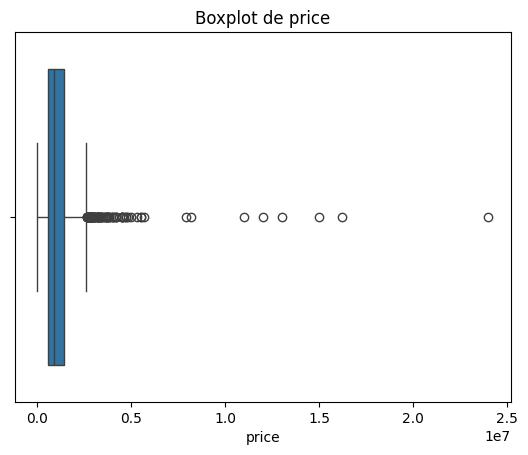

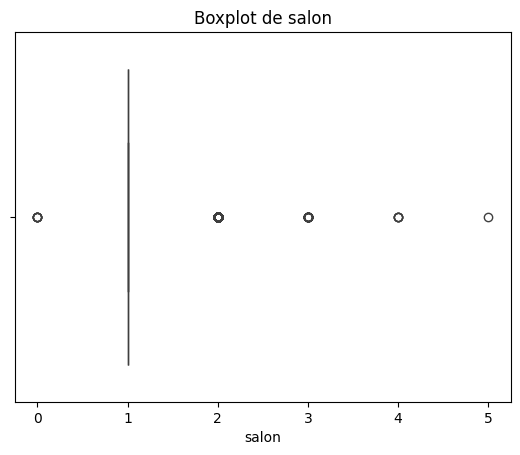

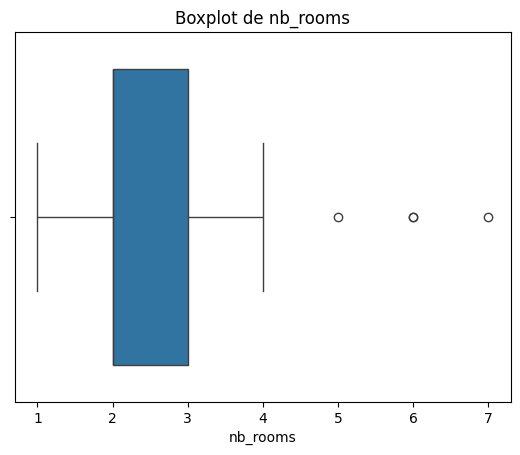

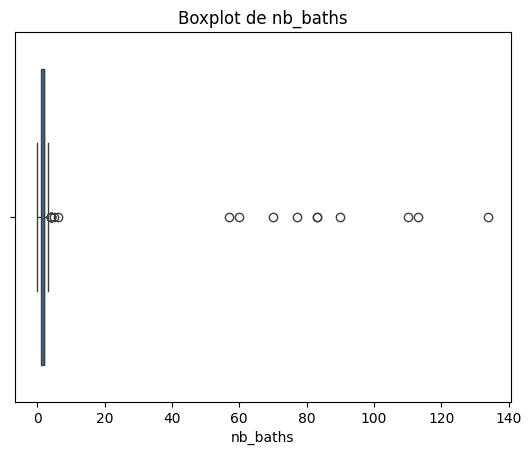

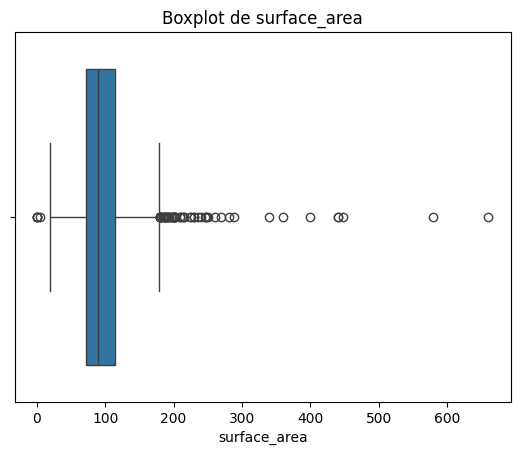

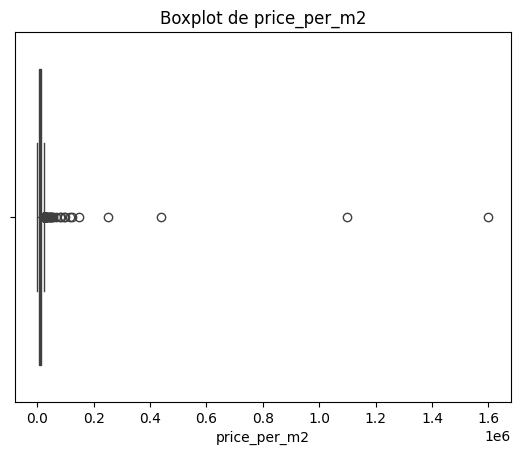

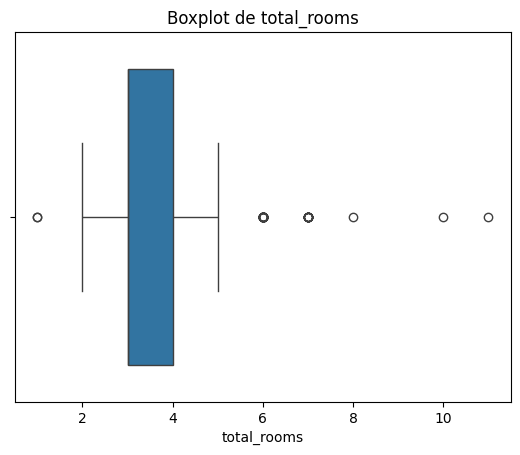

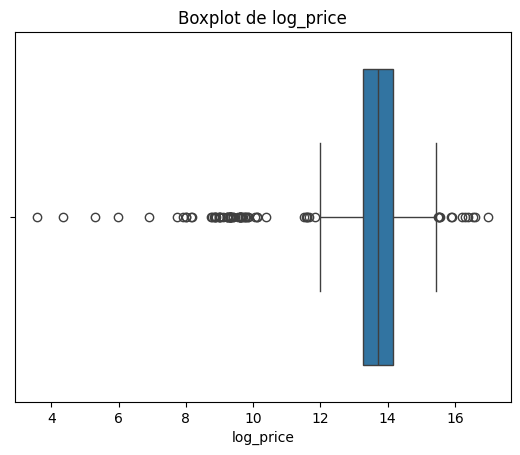

In [81]:
for i in df.select_dtypes(include='float').columns:
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot de {i}')
    plt.show()

In [82]:
# # Affichage de tous les outliers pour la colonne nb_baths selon IQR
# col = 'surface_area'
# if col in df.columns:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower = q1 - 1.5 * iqr
#     upper = q3 + 1.5 * iqr
#     outliers = df[(df[col] < lower) | (df[col] > upper)][col]
#     print(f"Nombre d'outliers pour {col} : {outliers.shape[0]}")
#     print("Valeurs des outliers :")
#    # print(outliers.tolist())
#     print(df.describe())

In [83]:
# # Capping des outliers pour toutes les colonnes float selon bornes IQR
cols=df.select_dtypes(include='float64').columns
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = max(q1 - 1.5 * iqr, 0)  # 🔒 éviter des valeurs négatives
    upper = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower, upper)
    print(f"Outliers capés pour {col} : bornes [{lower:.2f}, {upper:.2f}]")


Outliers capés pour price : bornes [0.00, 2628125.00]
Outliers capés pour salon : bornes [1.00, 1.00]
Outliers capés pour nb_rooms : bornes [0.50, 4.50]
Outliers capés pour nb_baths : bornes [0.00, 3.50]
Outliers capés pour surface_area : bornes [7.50, 179.50]
Outliers capés pour price_per_m2 : bornes [0.00, 23322.95]
Outliers capés pour total_rooms : bornes [1.50, 5.50]
Outliers capés pour log_price : bornes [11.95, 15.47]


In [84]:
outlier_report = {}

# Traitement price par ville avec capping IQR
if 'city_name' in df.columns and 'price' in df.columns:
    for city in df['city_name'].unique():
        mask = df['city_name'] == city
        q1 = df.loc[mask, 'price'].quantile(0.25)
        q3 = df.loc[mask, 'price'].quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        df.loc[mask, 'price'] = df.loc[mask, 'price'].clip(lower, upper)
        outlier_report[city] = [round(lower, 0), round(upper, 0)]

# Capping surface_area
if 'surface_area' in df.columns:
    df['surface_area'] = df['surface_area'].clip(40, 300)
    outlier_report['surface_area'] = [40, 300]

# Capping nb_baths
if 'nb_baths' in df.columns:
    df['nb_baths'] = np.minimum(df['nb_baths'], 4)
    outlier_report['nb_baths'] = ['max 4']

# Capping nb_rooms (optionnel)
if 'nb_rooms' in df.columns:
    df['nb_rooms'] = np.minimum(df['nb_rooms'], 5)
    outlier_report['nb_rooms'] = ['max 5']

print("Résumé du traitement des outliers :")
for key, val in outlier_report.items():
    print(f"{key}: {val}")


Résumé du traitement des outliers :
Casablanca: [np.float64(-747500.0), np.float64(3112500.0)]
Dar Bouazza: [np.float64(-762500.0), np.float64(2897500.0)]
Rabat: [np.float64(-981250.0), np.float64(4408750.0)]
Marrakech: [np.float64(-475000.0), np.float64(2445000.0)]
Asilah: [np.float64(302500.0), np.float64(1282500.0)]
Bouskoura: [np.float64(342125.0), np.float64(1443125.0)]
Kénitra: [np.float64(84999.0), np.float64(1405001.0)]
Mohammedia: [np.float64(-150000.0), np.float64(2090000.0)]
Tamesna: [np.float64(-111875.0), np.float64(1333125.0)]
Salé: [np.float64(-317500.0), np.float64(1982500.0)]
Had Soualem: [np.float64(270000.0), np.float64(830000.0)]
Benslimane: [np.float64(1099999.0), np.float64(1099999.0)]
Agadir: [np.float64(-476500.0), np.float64(2527500.0)]
Temara: [np.float64(-163750.0), np.float64(2406250.0)]
Tanger: [np.float64(-989000.0), np.float64(2875000.0)]
Bouznika: [np.float64(300000.0), np.float64(1020000.0)]
Meknès: [np.float64(-537500.0), np.float64(1682500.0)]
Fès: [n

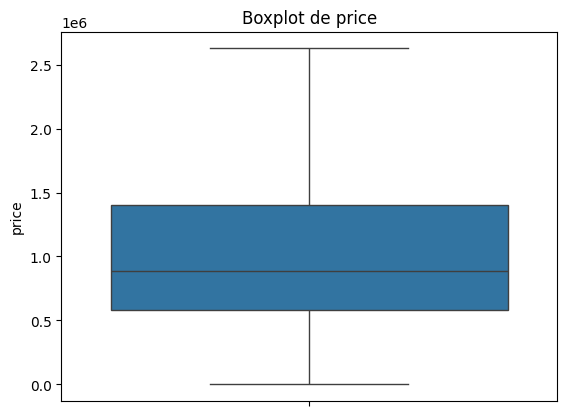

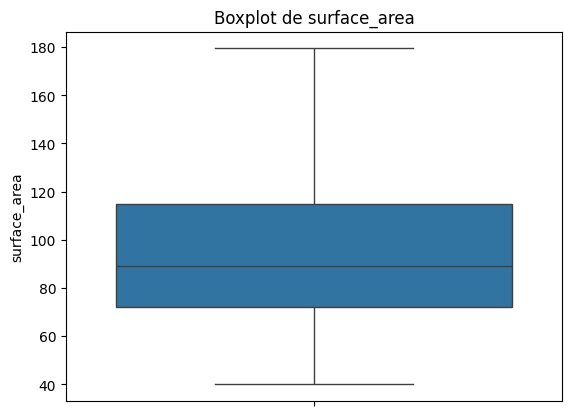

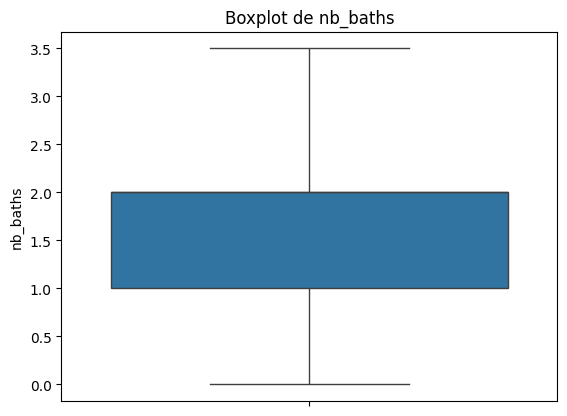

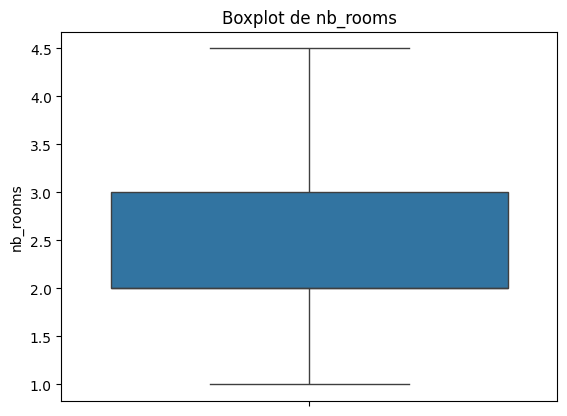

In [85]:
for i in ['price', 'surface_area', 'nb_baths', 'nb_rooms']:
        sns.boxplot(df[i])
        plt.title(f'Boxplot de {i}')
        plt.show()

In [86]:

# Encodage de la colonne city_name avec LabelEncoder
from sklearn.preprocessing import LabelEncoder
if 'city_name' in df.columns:
    le = LabelEncoder()
    df['city_name_encoded'] = le.fit_transform(df['city_name'])
    print("Colonne 'city_name' encodée (LabelEncoder) dans 'city_name_encoded'.")

Colonne 'city_name' encodée (LabelEncoder) dans 'city_name_encoded'.


In [87]:
# Application de la standardisation (StandardScaler) sur les variables numériques
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['float64']).columns.tolist()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)
print("Variables numériques standardisées prêtes pour la modélisation.")
df_scaled.head()

Variables numériques standardisées prêtes pour la modélisation.


,price,salon,nb_rooms,nb_baths,surface_area,price_per_m2,total_rooms,log_price
0,1.414123,0.0,-0.581652,0.509547,2.138607,0.181045,-0.708192,1.126936
1,0.201301,0.0,-0.581652,0.509547,0.057348,0.235943,-0.708192,0.409589
2,0.434826,0.0,-0.581652,0.509547,-0.448100,1.085245,-0.708192,0.579465
3,-0.243149,0.0,-2.122128,-1.075225,-1.191407,0.972220,-1.902059,0.014691
4,2.360463,0.0,0.958825,0.509547,2.480528,0.863716,1.679543,1.737383


In [88]:
# Sélection des variables explicatives corrélées au prix et vérification de la redondance


# 1. Calcul de la matrice de corrélation sur les variables numériques
corr_matrix = df.corr(numeric_only=True)

# 2. Sélection des variables numériques corrélées au prix (|corr| > 0.15)
price_corr = corr_matrix['price'].drop('price')
selected_vars = price_corr[price_corr.abs() > 0.15].sort_values(ascending=False)
print('Variables numériques corrélées au prix (|corr| > 0.15) :')
for var, corr_val in selected_vars.items():
    print(f"- {var} : corr = {corr_val:.2f}")

# 3. Vérification de la redondance entre les variables sélectionnées
selected_corr_matrix = corr_matrix.loc[selected_vars.index, selected_vars.index]
print('\nMatrice de corrélation entre les variables sélectionnées :')
print(selected_corr_matrix.round(2))

# 4. Identification des couples fortement corrélés entre eux (|corr| > 0.8)
high_corr = []
for i, var1 in enumerate(selected_vars.index):
    for var2 in selected_vars.index[i+1:]:
        corr_val = selected_corr_matrix.loc[var1, var2]
        if abs(corr_val) > 0.8:
            high_corr.append((var1, var2, corr_val))
if high_corr:
    print('\nAttention : couples de variables fortement corrélées entre elles (|corr| > 0.8) :')
    for var1, var2, corr_val in high_corr:
        print(f"- {var1} & {var2} : corr = {corr_val:.2f}")
else:
    print('\nAucune forte redondance détectée entre les variables sélectionnées.')

Variables numériques corrélées au prix (|corr| > 0.15) :
- log_price : corr = 0.94
- price_per_m2 : corr = 0.80
- surface_area : corr = 0.63
- nb_baths : corr = 0.41
- total_rooms : corr = 0.37
- nb_rooms : corr = 0.35
- Ascenseur : corr = 0.34
- Parking : corr = 0.26
- Climatisation : corr = 0.23
- Terrasse : corr = 0.22
- Chauffage : corr = 0.21
- Concierge : corr = 0.21
- Balcon : corr = 0.16

Matrice de corrélation entre les variables sélectionnées :
               log_price  price_per_m2  surface_area  nb_baths  total_rooms  \
log_price           1.00          0.82          0.57      0.38         0.35   
price_per_m2        0.82          1.00          0.14      0.16         0.00   
surface_area        0.57          0.14          1.00      0.57         0.70   
nb_baths            0.38          0.16          0.57      1.00         0.49   
total_rooms         0.35          0.00          0.70      0.49         1.00   
nb_rooms            0.33         -0.00          0.64      0.47     

In [89]:
# Séparation des données pour la modélisation
from sklearn.model_selection import train_test_split
features = [var for var in selected_vars.index if var != 'log_price']
# Variable cible
y = df['price']

# Variables explicatives : colonnes sélectionnées précédemment
X = df[features]

# Division des données en ensemble d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de X_test : {X_test.shape}")
print(f"Taille de y_train : {y_train.shape}")
print(f"Taille de y_test : {y_test.shape}")

Taille de X_train : (1163, 12)
Taille de X_test : (291, 12)
Taille de y_train : (1163,)
Taille de y_test : (291,)


In [90]:
print(features)

['price_per_m2', 'surface_area', 'nb_baths', 'total_rooms', 'nb_rooms', 'Ascenseur', 'Parking', 'Climatisation', 'Terrasse', 'Chauffage', 'Concierge', 'Balcon']


In [91]:
# Entraînement et évaluation de plusieurs modèles de régression avec toutes les métriques
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

models = {
    'Régression Linéaire': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"R² : {r2:.2f}")


=== Régression Linéaire ===
MSE : 36389324463.99
RMSE : 190759.86
MAE : 114035.40
R² : 0.93

=== Random Forest ===
MSE : 14676254304.44
RMSE : 121145.59
MAE : 38235.40
R² : 0.97

=== SVR ===
MSE : 524231948662.78
RMSE : 724038.64
MAE : 537553.96
R² : -0.07

=== Gradient Boosting ===
MSE : 16859717392.26
RMSE : 129844.97
MAE : 57034.02
R² : 0.97


In [92]:
# Validation croisée pour évaluer la robustesse des modèles
from sklearn.model_selection import cross_val_score
print("Validation croisée (5-fold) - Score R² moyen et écart-type :")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name}: R² moyen = {scores.mean():.3f}, écart-type = {scores.std():.3f}")

Validation croisée (5-fold) - Score R² moyen et écart-type :
Régression Linéaire: R² moyen = 0.913, écart-type = 0.017
Random Forest: R² moyen = 0.970, écart-type = 0.011
SVR: R² moyen = -0.085, écart-type = 0.056
Gradient Boosting: R² moyen = 0.962, écart-type = 0.011


In [93]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

best_params = {}

# Linear Regression (GridSearch rapide car peu d'hyperparamètres)
from sklearn.linear_model import LinearRegression
lr_grid = {'fit_intercept': [True, False]}
from sklearn.model_selection import GridSearchCV
lr_search = GridSearchCV(LinearRegression(), lr_grid, cv=3, scoring='r2')
lr_search.fit(X, y)
best_params['Régression Linéaire'] = lr_search.best_params_
print(f"Régression Linéaire - meilleurs paramètres : {lr_search.best_params_}")

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_grid = {'n_estimators': [50, 100], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]}
rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                              rf_grid,
                              n_iter=6,   # nombre d'itérations aléatoires
                              cv=3,
                              scoring='r2',
                              n_jobs=-1,
                              random_state=42)
rf_search.fit(X, y)
best_params['Random Forest'] = rf_search.best_params_
print(f"Random Forest - meilleurs paramètres : {rf_search.best_params_}")

# SVR
from sklearn.svm import SVR
svr_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svr_search = RandomizedSearchCV(SVR(),
                               svr_grid,
                               n_iter=6,
                               cv=3,
                               scoring='r2',
                               n_jobs=-1,
                               random_state=42)
svr_search.fit(X, y)
best_params['SVR'] = svr_search.best_params_
print(f"SVR - meilleurs paramètres : {svr_search.best_params_}")

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb_grid = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
gb_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=42),
                              gb_grid,
                              n_iter=6,
                              cv=3,
                              scoring='r2',
                              n_jobs=-1,
                              random_state=42)
gb_search.fit(X, y)
best_params['Gradient Boosting'] = gb_search.best_params_
print(f"Gradient Boosting - meilleurs paramètres : {gb_search.best_params_}")

print("\nRésumé des meilleurs hyperparamètres pour chaque modèle :")
for name, params in best_params.items():
    print(f"{name}: {params}")


Régression Linéaire - meilleurs paramètres : {'fit_intercept': True}
Random Forest - meilleurs paramètres : {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}
SVR - meilleurs paramètres : {'kernel': 'linear', 'gamma': 'auto', 'C': 10}
Gradient Boosting - meilleurs paramètres : {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

Résumé des meilleurs hyperparamètres pour chaque modèle :
Régression Linéaire: {'fit_intercept': True}
Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}
SVR: {'kernel': 'linear', 'gamma': 'auto', 'C': 10}
Gradient Boosting: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


In [94]:
from sklearn.model_selection import cross_val_score

print("Validation croisée (10-fold) - MAE et R² moyens :")
for name, model in models.items():
    # MAE
    mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
    # R²
    r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

    print(f"{name}:")
    print(f"  🔹 MAE moyen     = {mae_scores.mean():,.2f}, écart-type = {mae_scores.std():,.2f}")
    print(f"  🔹 R²  moyen     = {r2_scores.mean():.4f}, écart-type = {r2_scores.std():.4f}")


Validation croisée (10-fold) - MAE et R² moyens :
Régression Linéaire:
  🔹 MAE moyen     = 113,905.78, écart-type = 10,882.77
  🔹 R²  moyen     = 0.9129, écart-type = 0.0263
Random Forest:
  🔹 MAE moyen     = 39,483.98, écart-type = 12,516.33
  🔹 R²  moyen     = 0.9671, écart-type = 0.0267
SVR:
  🔹 MAE moyen     = 506,669.89, écart-type = 38,766.79
  🔹 R²  moyen     = -0.0848, écart-type = 0.0562
Gradient Boosting:
  🔹 MAE moyen     = 53,662.50, écart-type = 8,931.45
  🔹 R²  moyen     = 0.9610, écart-type = 0.0248


In [95]:
# Sélection et sauvegarde du meilleur modèle
import joblib
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'name': name, 'model': model, 'r2': r2, 'rmse': rmse})
best = max(results, key=lambda x: (x['r2'], -x['rmse']))
print(f"Meilleur modèle : {best['name']} | R² = {best['r2']:.3f} | RMSE = {best['rmse']:.2f}")
joblib.dump(best['model'], '../models/model.pkl')
print("Modèle sauvegardé dans 'model.pkl'")

Meilleur modèle : Random Forest | R² = 0.970 | RMSE = 121145.59
Modèle sauvegardé dans 'model.pkl'


In [96]:
# Comparaison des prix réels et prédits pour chaque modèle
import pandas as pd
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    comparison = pd.DataFrame({'Prix réel': y_test.values, 'Prix prédit': y_pred, "diff " : y_test.values - y_pred })
    print(f"\n{name} - Comparaison des prix réels et prédits (échantillon 10 premières lignes):")
    print(comparison.head(10))


Régression Linéaire - Comparaison des prix réels et prédits (échantillon 10 premières lignes):
   Prix réel   Prix prédit          diff 
0   750000.0  1.465728e+06 -715727.683812
1  1100000.0  1.081924e+06   18075.580154
2   720000.0  7.348893e+05  -14889.302884
3   900000.0  9.307827e+05  -30782.701392
4  2400000.0  2.176286e+06  223713.511430
5   730000.0  7.351553e+05   -5155.271536
6   520000.0  4.867150e+05   33285.042087
7   450000.0  4.460665e+05    3933.475085
8   460000.0  4.146420e+05   45357.982059
9   610000.0  7.368443e+05 -126844.283182

Random Forest - Comparaison des prix réels et prédits (échantillon 10 premières lignes):
   Prix réel  Prix prédit    diff 
0   750000.0     837075.0 -87075.0
1  1100000.0    1083900.0  16100.0
2   720000.0     732115.0 -12115.0
3   900000.0     892778.0   7222.0
4  2400000.0    2374362.5  25637.5
5   730000.0     731643.0  -1643.0
6   520000.0     540550.0 -20550.0
7   450000.0     447950.0   2050.0
8   460000.0     457350.0   2650.0
9 

In [97]:
# Comparaison des scores d'entraînement et de test pour détecter l'overfitting
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("\n--- Comparaison des scores d'entraînement et de test pour chaque modèle ---")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f"\n{name}")
    print(f"R² entraînement : {r2_train:.3f} | R² test : {r2_test:.3f}")
    print(f"RMSE entraînement : {rmse_train:.2f} | RMSE test : {rmse_test:.2f}")
    print(f"MAE entraînement : {mae_train:.2f} | MAE test : {mae_test:.2f}")
    if r2_train - r2_test > 0.15:
        print("⚠️ Possible surapprentissage (overfitting) détecté : l'écart entre R² entraînement et test est important.")


--- Comparaison des scores d'entraînement et de test pour chaque modèle ---

Régression Linéaire
R² entraînement : 0.913 | R² test : 0.926
RMSE entraînement : 192518.52 | RMSE test : 190759.86
MAE entraînement : 112210.06 | MAE test : 114035.40

Random Forest
R² entraînement : 0.995 | R² test : 0.970
RMSE entraînement : 48244.87 | RMSE test : 121145.59
MAE entraînement : 16051.80 | MAE test : 38235.40

SVR
R² entraînement : -0.066 | R² test : -0.066
RMSE entraînement : 675355.46 | RMSE test : 724038.64
MAE entraînement : 498064.17 | MAE test : 537553.96

Gradient Boosting
R² entraînement : 0.986 | R² test : 0.966
RMSE entraînement : 76684.97 | RMSE test : 129844.97
MAE entraînement : 38340.55 | MAE test : 57034.02


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Modèle exemple
from sklearn.metrics import r2_score

# Supposons que X, y sont tes features et target

# 1. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialisation du modèle (ici Random Forest)
model = RandomForestRegressor(random_state=42)

# 3. Entraînement
model.fit(X_train, y_train)

# 4. Prédictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 5. Scores R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² sur train : {r2_train:.3f}")
print(f"R² sur test  : {r2_test:.3f}")

# 6. Interprétation
if r2_train - r2_test > 0.1:
    print("⚠️ Potentiel overfitting détecté : le modèle performe beaucoup mieux sur le train que sur le test.")
else:
    print("✅ Pas de signe évident d’overfitting, le modèle généralise bien.")


R² sur train : 0.995
R² sur test  : 0.970
✅ Pas de signe évident d’overfitting, le modèle généralise bien.
